In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56841
           1       1.00      0.99      1.00      5709

    accuracy                           1.00     62550
   macro avg       1.00      1.00      1.00     62550
weighted avg       1.00      1.00      1.00     62550

ROC-AUC Score: 0.996575160386687


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9992166266986411

<Axes: >

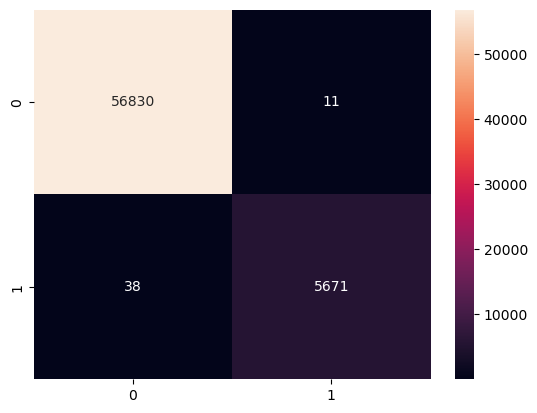

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [12]:
joblib.dump(model, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']